# Import Libraries


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import math


In [ ]:
# Function to convert RGB to hex.
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
# Conversion from BGR to RGB
def get_image(image_path):
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

In [ ]:
# Convert the image to a form that is suitable for clustering(Flattens to 2 dimension)

def get_colors(image, number_of_colors):

    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    center_colors = clf.cluster_centers_

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))


    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    # plotting the figures
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([47.2035804 , 49.49812942, 75.55383989]), array([4.72915593, 4.44126705, 6.35604299]), array([173.84891813, 155.15597477, 155.99260628])]


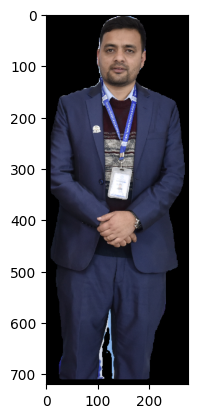

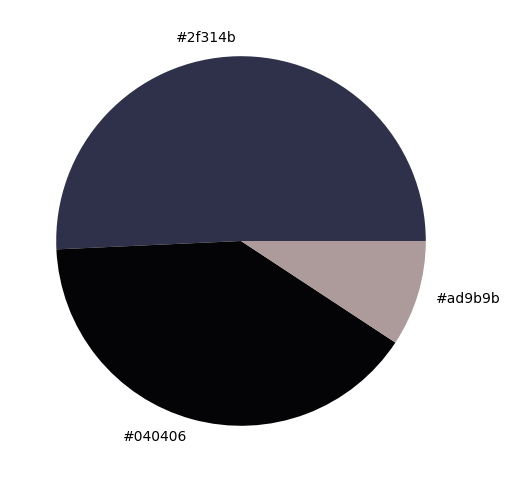

In [ ]:
# Get colours from the image
image_path = '/content/masked_sample1.png'

image = get_image(image_path)
image_colors = get_colors(image, number_of_colors=3)
print(image_colors)

In [ ]:
# Calculating the euclidean distance
navy_blue = np.array([32,42,68])
each_dist = []

for j in range(len(image_colors)):

  image_color = rgb2lab(np.uint8(np.asarray([[image_colors[j]]])))
  #sum = 0

  for i in range(len(navy_blue)):

    selected_color = rgb2lab(np.uint8(np.asarray(navy_blue)))

    diff = deltaE_cie76(selected_color, image_color)
  print(diff)

  each_dist.append(diff)
#     sum = sum + math.pow((navy_blue[i] - image_color[i]), 2)

#   distance = math.sqrt(sum)
#   print(distance)
#   each_dist.append(distance)

min_diff = min(each_dist)
print(min_diff)

# color with min distance
min_index = each_dist.index(min_diff)
print(min_index)


[[24.66460065]]
[[43.71606848]]
[[14.31096071]]
[[14.31096071]]
2


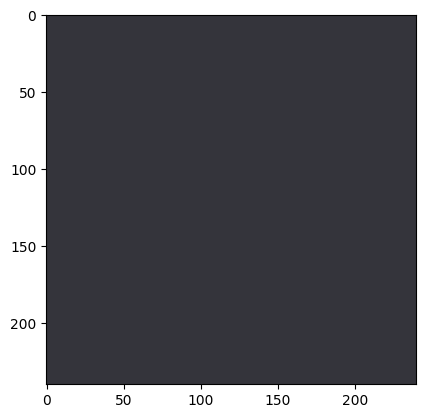

In [ ]:
# showing color with min distance

height = 240
width = 240

blank_image = np.zeros((height,width,3), np.uint8)

blank_image[:]= image_colors[min_index]

plt.imshow(blank_image)
